<a href="https://colab.research.google.com/github/Kaedone/VisNov/blob/main/%D1%80%D0%B0%D1%81%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_(%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D0%BE%D0%BA)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt #Визуализируем данный
import numpy as np #Бинарная математика
import os 
import PIL #Картинки
import tensorflow as tf #Сами сеточки

from tensorflow import keras #Базовая обработка
from tensorflow.keras import layers #Слои
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #Ссылка на фотки
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) #Вместо цветов подставь название корневого каталога
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg'))) #Просто смотрим на кол-во фоток
print(image_count)

3670


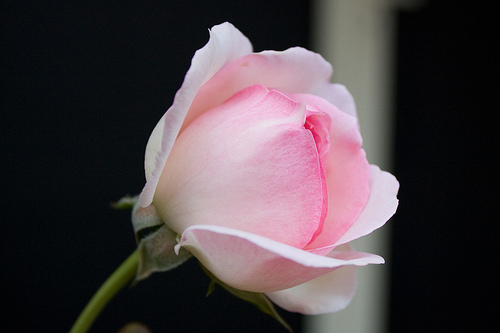

In [ ]:
roses = list(data_dir.glob('roses/*')) #Сортируем по категориям
PIL.Image.open(str(roses[0]))

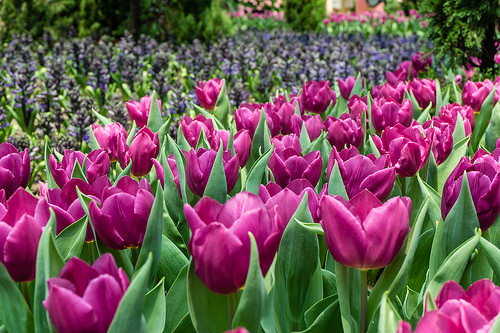

In [ ]:
tulips = list(data_dir.glob('tulips/*')) #Следующая категория
PIL.Image.open(str(tulips[0]))

In [ ]:
# Повторяем N раз

А вот теперь начинается обучение

In [ ]:
# тут задаём стандарты картинок
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# это препроцессор, я хз, мб я выбрал и не правильный, но какой есть
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Собственно говоря градиентный буст [70:30]
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Проверяем наши категории
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
# Тут гавно код полнейший, но я устал
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Стандартизируем данные
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# Ставим слои
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Значения пикселей теперь находятся в [0,1]
print(np.min(first_image), np.max(first_image))

0.0 0.99028325


In [ ]:
# Создаём модель
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# Компилируем это гавно
model.compile(optimizer='adam', # Самый топовый оптимизатор (буст=спуск) 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Смотрим что получилось
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
# тренируем модель (поставь на ночь)
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 36s 38ms/step - loss: 1.5419 - accuracy: 0.3333 - val_loss: 1.0754 - val_accuracy: 0.5845
Epoch 2/10
92/92 [==============================] - 2s 20ms/step - loss: 1.0507 - accuracy: 0.5867 - val_loss: 0.9182 - val_accuracy: 0.6362
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.8043 - accuracy: 0.7012 - val_loss: 0.9283 - val_accuracy: 0.6322
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.5739 - accuracy: 0.7931 - val_loss: 0.9647 - val_accuracy: 0.6471
Epoch 5/10
92/92 [==============================] - 2s 20ms/step - loss: 0.3634 - accuracy: 0.8853 - val_loss: 1.0480 - val_accuracy: 0.6390
Epoch 6/10
92/92 [==============================] - 2s 20ms/step - loss: 0.1936 - accuracy: 0.9472 - val_loss: 1.2958 - val_accuracy: 0.6403
Epoch 7/10
92/92 [==============================] - 2s 20ms/step - loss: 0.1484 - accuracy: 0.9590 - val_loss: 1.5169 - val_accuracy: 0.6540
Epoch 8/10
9